In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [2]:
df = pd.read_csv("articleInfo.csv")
df2 = pd.read_csv("authorInfo.csv")

In [3]:
df = pd.merge(df, df2, on='Article No.')
df = df.fillna(0)

In [4]:
df.head()

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


Problem 1

In [5]:
publications = {}
citations = {}
countries = {}
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    cite = df.loc[index]['Citation']
    temp = title
    year = df.loc[index]['Year']
    if year in publications:
        count = publications[year] + 1
        publications[year] = count
        count = citations[year] + cite
        citations[year] = count
    else:
        publications[year] = 1
        citations[year] = cite


[Text(0.5, 1.0, 'Yearly Publication'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Publications')]

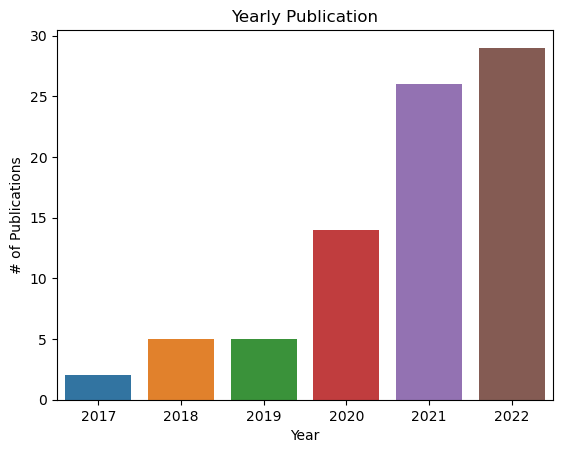

In [6]:
keys = list(publications.keys())
vals = list(publications.values())
sns.barplot(x=keys, y=vals).set(title="Yearly Publication", xlabel ="Year", ylabel="# of Publications")

[Text(0.5, 1.0, 'Yearly Citations'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Citations')]

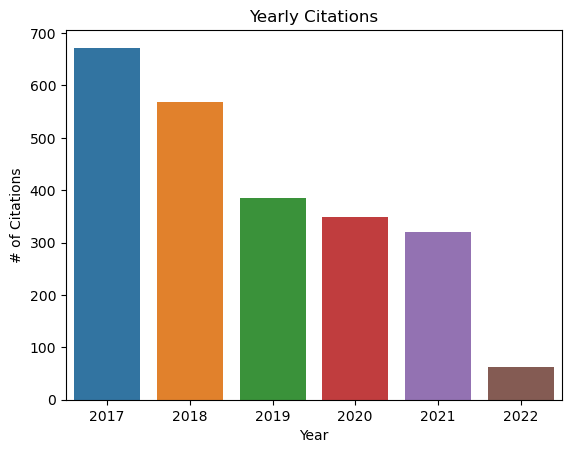

In [7]:
keys = list(citations.keys())
vals = list(citations.values())
sns.barplot(x=keys, y=vals).set(title="Yearly Citations", xlabel ="Year", ylabel="# of Citations")

In [8]:
countries = {}
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    temp = title
    country = df.loc[index]['Country']
    if country in countries:
        count = countries[country] + 1
        countries[country] = count
    else:
        countries[country] = 1


<AxesSubplot:>

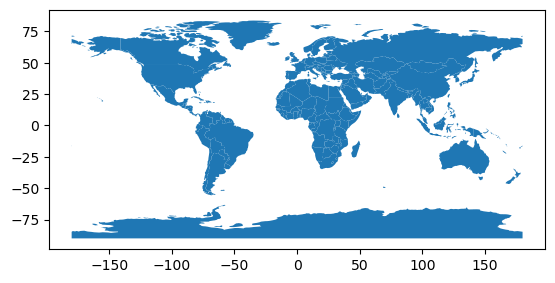

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) ########################Ask how to implement geopandas
world.plot()

In [10]:
institutions = {} ################### Ask abt correct number of publications by institutions
temp = ""
for index in range(df.shape[0]):
    if temp == df.loc[index]['Title']:
        continue
    title = df.loc[index]['Title']
    temp = title
    school = df.loc[index]['Author Affiliation']
    if school in institutions:
        count = institutions[school] + 1
        institutions[school] = count
    else:
        institutions[school] = 1

In [12]:
top_5 = sorted(institutions.items(), key=lambda x: x[1], reverse=True)


In [18]:
print("Top 5 Universities with the Most Publications:")
rank = 1
for school in top_5:
    print(str(rank) + ". " + str(school[0]))
    rank = rank + 1
    if rank == 6:
        break

Top 5 Universities with the Most Publications:
1. Cyprus University of Technology
2. University of Copenhagen
3. Fudan University 
4. National Taiwan Ocean University
5. Daejeon Health Institute of Technology


In [19]:
df.head()

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


In [22]:
highest_h = {}
for index in range(df.shape[0]):
    author = df.loc[index]['Author Name']
    h = df.loc[index]['h-index']
    if author in highest_h:
        count = highest_h[author] + h
        highest_h[author] = count
    else:
        highest_h[author] = h

In [32]:
top_5 = sorted(highest_h.items(), key=lambda x: x[1], reverse=True)

In [33]:
print("Top 5 Researchers with the Highest h-index:")
rank = 1
for school in top_5:
    print(str(rank) + ". " + str(school[0]))
    rank = rank + 1
    if rank == 6:
        break

Top 5 Researchers with the Highest h-index:
1. Ulrich Trautwein
2. Nicolas Molinari
3. George S. Athwal
4. Sellappan Palaniappan
5. Maria Luisa Lorusso


Problem 2